In [1]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVC

In [2]:
# This part of project is final part after data fetching, and data cleaning, shuffling the data is also done,
# to prevent overfitting.

In [7]:
shuffled_data = pd.read_csv('Clean_shuffled_data_final.csv')

In [10]:
# features considered, 
# Airways, 
# Arrival Time, Departure Time
# Flight Duration
# Days to booking and Flight
# Hopping

print shuffled_data.head()

   Available  Duration  Total_Fare  no_of_days_to_flight  Airways_Air India  \
0          7       750        6792                    33                  0   
1          2       130        3197                    56                  0   
2          7       320        8173                    41                  0   
3         19       265        4542                    29                  0   
4          5       725        7170                    28                  0   

   Airways_AirAsia  Airways_Go Air  Airways_IndiGo  Airways_Jet Airways  \
0                0               0               0                    1   
1                0               0               0                    0   
2                0               0               0                    1   
3                0               0               1                    0   
4                0               0               0                    1   

   Airways_Spicejet      ...       Dept_Time_BSR  Dept_Time_MDSS  \
0     

In [11]:
Flight_Price = shuffled_data['Total_Fare']

In [12]:
del shuffled_data['Total_Fare']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
shuffled_data_train, shuffled_data_test, Flight_Price_train, Flight_Price_test = train_test_split(shuffled_data,Flight_Price, test_size=0.05, random_state=42)

In [15]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
models = [LinearRegression(),
              RandomForestRegressor(n_estimators=100, max_features='sqrt'),
              KNeighborsRegressor(n_neighbors=6),
              SVR(kernel='linear'),
              LogisticRegression()
              ]
TestModels = pd.DataFrame()
tmp = {}

In [19]:
model_name_list = list()
r2_score_list = list()
mean_abs_err_list = list()
mean_sq_err_list = list()
i = 0
for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    model.fit(shuffled_data_train, Flight_Price_train)
    predicted_value = model.predict(shuffled_data_test)
    indi_r2_score = r2_score(Flight_Price_test, predicted_value )
    r2_score_list.insert(i,indi_r2_score)
#     model_name_list.insert(i,m)
#     print confusion_matrix(Flight_Price_test,predicted_value)
    mae =  mean_absolute_error(Flight_Price_test,predicted_value)
    mse = mean_squared_error(Flight_Price_test,predicted_value)
    mean_abs_err_list.insert(i,mae)
    mean_sq_err_list.insert(i,mse)
    i += 1

In [20]:
model_name = ('LinearRegression','RandomForestRegressor','KNeighborsRegressor','SVR','LogisticRegression')

##### The r2_score function computes R², the coefficient of determination. It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0

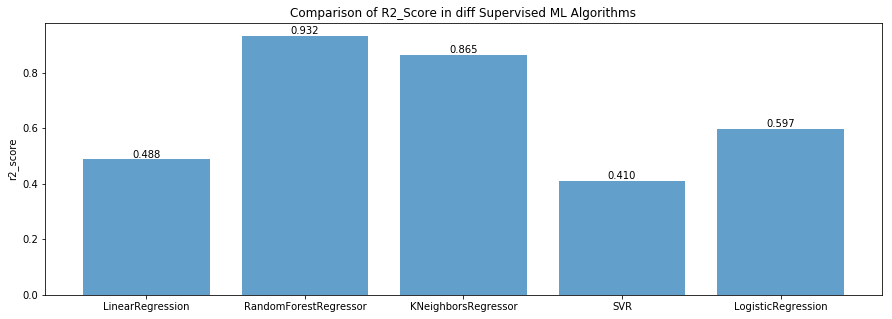

In [34]:
# Plotting R2 score values in diff Supervised Regression Algorithms

y_pos = np.arange(len(model_name))
plt.figure(figsize=(15,5))
bar1 = plt.bar(y_pos, r2_score_list, align='center', alpha=0.7)

for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % float(r2_score_list[i]), ha='center', va='bottom')

plt.xticks(y_pos, model_name)
plt.ylabel('r2_score')
plt.title('Comparison of R2_Score in diff Supervised ML Algorithms')
plt.savefig('r2_score_vs_algo.png')
plt.show()

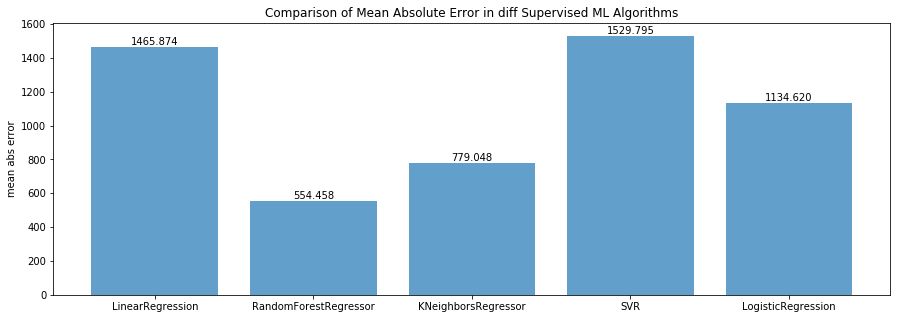

In [36]:
y_pos = np.arange(len(model_name))
plt.figure(figsize=(15,5))
bar1 = plt.bar(y_pos, mean_abs_err_list, align='center', alpha=0.7)

for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % float(mean_abs_err_list[i]), ha='center', va='bottom')

plt.xticks(y_pos, model_name)
plt.ylabel('mean abs error')
plt.title('Comparison of Mean Absolute Error in diff Supervised ML Algorithms')
plt.savefig('MAE_vs_algo.png')
plt.show()

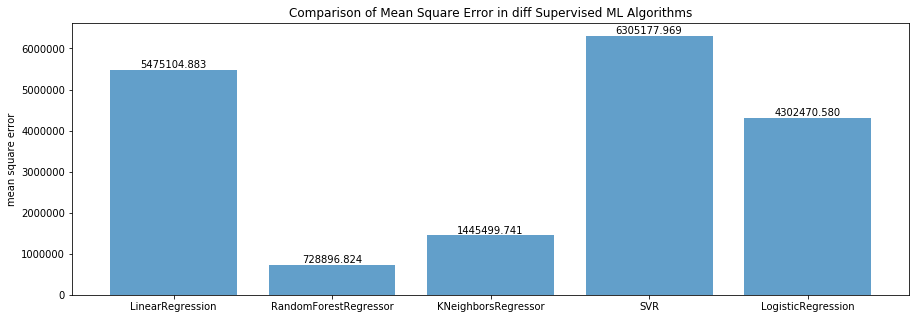

In [37]:
y_pos = np.arange(len(model_name))
plt.figure(figsize=(15,5))
bar1 = plt.bar(y_pos, mean_sq_err_list, align='center', alpha=0.7)

for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % float(mean_sq_err_list[i]), ha='center', va='bottom')

plt.xticks(y_pos, model_name)
plt.ylabel('mean square error')
plt.title('Comparison of Mean Square Error in diff Supervised ML Algorithms')
plt.savefig('MSE_vs_algo.png')
plt.show()

##### Now, seeing the R2_Score, Mean Squared Error and Mean Abs Error, We come to conclusion that Random Forest with 100 Trees is best fit for this regression problem.

### Now looking into RandomForests Regressor for Fit line

In [38]:
RF_model = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [39]:
RF_model = RF_model.fit(shuffled_data_train, Flight_Price_train)

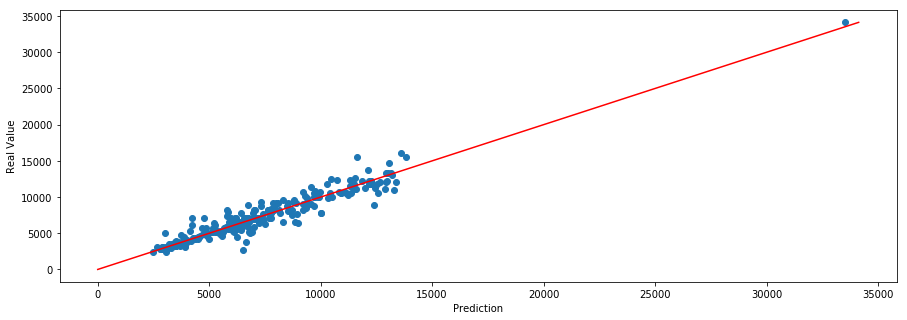

In [40]:
RF_model_pred_flight_price = RF_model.predict(shuffled_data_test)

plt.figure(figsize=(15,5))
plt.scatter(RF_model_pred_flight_price, Flight_Price_test)
plt.xlabel('Prediction')
plt.ylabel('Real Value')

diagonal = np.linspace(0, np.max(Flight_Price_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [41]:
# This gives us the RandomForest Visualisation by printing Tree in .Dot file 
from sklearn import tree
i_tree = 0
for tree_in_forest in RF_model.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [42]:
# This creates information about Forest trees. 
# One such can be seen at -> https://imgur.com/a/cYZQb